In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
import os

sys.path.append(os.path.abspath('../'))

del sys, os

In [123]:
import pandas as pd
import numpy as np
import models.vae
import models.gan
from torch import nn
import torch 
from time import time

In [14]:
import matplotlib.pyplot as plt

In [9]:
# LaTeX rendering in graphs
from distutils.spawn import find_executable

if find_executable('latex'):
    plt.rc('text', usetex=True)
else:
    print('LaTeX not found...')

plt.rc('font', family='serif')

# High resolution graphs
%config InlineBackend.figure_format = 'retina'

## Problem 3
## Qualitative Analysis

In [370]:
vae = models.vae.VariationalAutoEncoder(svhn=True)
vae.load_state_dict(torch.load('../learning/vae_svhn.pth', map_location='cpu'))

### Visual Samples
We execute the cell below to obtain visual samples from the trained VAE. We note that the samples are relatively diverse, though they tend to focus more on individual digits. We also note the samples are quite blurry, which we can interpret as a consequence of the maximum-likelihood objective of Variational Autoencoders. Indeed, since VAEs are trained to maximize the log-likelihood for their inputs, areas of latent space "in-between" input points are given relatively high density, but nothing in the optimization leads us to believe they will have high resolution.

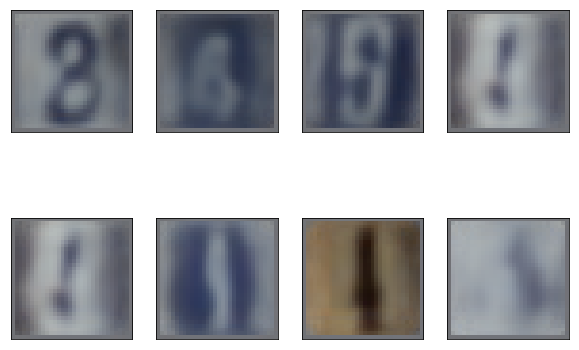

In [372]:
images = []
for i in range(8):
    images.append(vae.sample_image(torch.device('cpu')).permute(1, 2, 0).detach().numpy())
fig, ax = plt.subplots(2,4, figsize=(10,7))
for j in range(2):
    for i in range(4):
        ax[j,i].imshow(images[j*3+i])
        ax[j,i].set_xticks([]) 
        ax[j,i].set_yticks([])

We do the same for the GAN samples. TODO COMMENT

In [373]:
gan = models.gan.GAN(torch.device('cpu'))
gan.load_state_dict(torch.load('../learning/gan.pth', map_location='cpu'))

### Checking for a Disentangled Representation

In [374]:
def plot_perturbation(model, idx):
    s1, s2 = model.perturb(idx, 2)
    s1 = s1.permute(1, 2, 0).detach().numpy()
    s2 = s2.permute(1, 2, 0).detach().numpy()
    fix, ax = plt.subplots(1,2)
    ax[0].imshow(s1)
    ax[1].imshow(s2)

### VAE

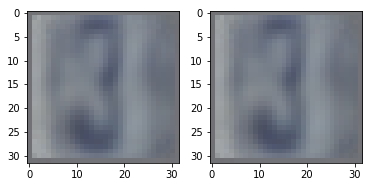

In [378]:
plot_perturbation(vae,idx=50)

### GAN

In [379]:
plot_perturbation(gan, idx=50)

RuntimeError: output with shape [] doesn't match the broadcast shape [1]

### Interpolations

In [387]:
def plot_interpolation(img_list):
    images = []
    for img in img_list:
        images.append(img.permute(1, 2, 0).detach().numpy()) 
    fig, ax = plt.subplots(1,11, figsize=(20,5))
    for i in range(11):
        ax[i].imshow(images[i])
        ax[i].set_xticks([]) 
        ax[i].set_yticks([])

In [388]:
vae_latent, vae_data = vae.interpolation()
gan_latent, gan_data = gan.interpolation()

#### VAE Latent Space Interpolation

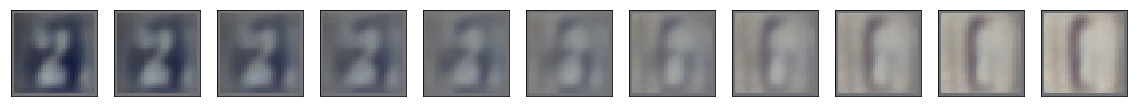

In [389]:
plot_interpolation(vae_latent)

#### VAE Data Space Interpolation

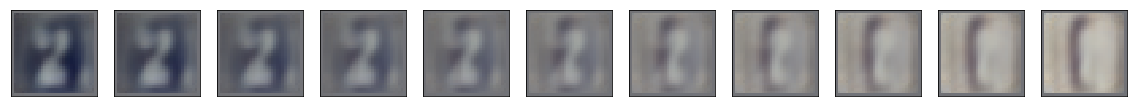

In [390]:
plot_interpolation(vae_data)

#### GAN Latent Space Interpolation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


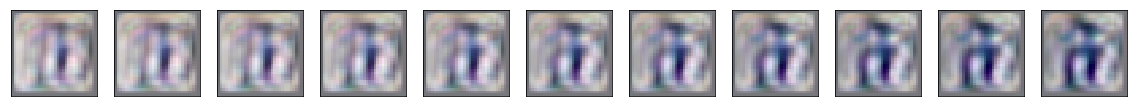

In [391]:
plot_interpolation(gan_latent)

#### GAN Data Space Interpolation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


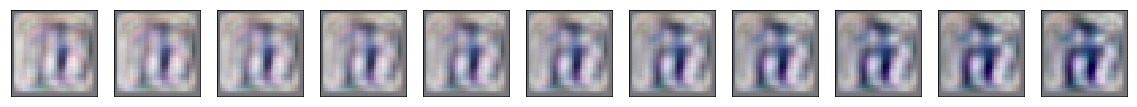

In [392]:
plot_interpolation(gan_data)

## Quantitative Analysis

In [399]:
from torchvision.transforms import ToPILImage
from torchvision.utils import save_image

"""
for ix in range(1000):
    img = gan.sample_image()
    save_image(img, '../base/samples_gan/samples/gan_sample_{}.png'.format(ix))
"""
for ix in range(1000):
    img = vae.sample_image(torch.device('cpu'))
    save_image(img, '../base/samples_vae/samples/vae_sample_{}.png'.format(ix))

OSError: [Errno 5] Input/output error

In [368]:
%run -i '../base/score_fid.py' '../base/samples_gan'

Test
FID score: 106291.977


In [400]:
%run -i '../base/score_fid.py' '../base/samples_vae'

Test
Using downloaded and verified file: svhn/test_32x32.mat
FID score: (51487.647+0j)
